<img src="../../Img/backdrop-wh.png" alt="Drawing" style="width: 300px;"/>

<div style="display: block; width: 100%; height: 100px;">

<p style="float: left;">
    <span style="font-weight: bold; font-size: 20px;">
        DIGHUM160 - Critical Digital Humanities 
        <br />
        <br />
        Final Project
    </span>
</p>


**Project title:** Digital Dialogues: Analyzing Relationship Discourse and Gender Dynamics on r/relationship_advice

**Student name:** Kenza Achki


In [1]:
# set up your environment

import json
import os
import pandas as pd
import numpy as np

import pickle
from gensim.models import Word2Vec
import multiprocessing

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE# Package imports
import os
import pandas as pd
import numpy as np

# < import other packages here >


: 

## Introduction


In the ocean of contemporary life, relationships are a complex current, with societal expectations, technological advancements, and personal struggles. It appears that amidst the noise, the digital realm has emerged as a confessional for our most intimate challenges. One of these platforms is r/relationship_advice. 


r/relationship_advice is a subreddit in which one asks for and shares personal experiences relating to their relationships. The board has visibility beyond the Reddit site alone; many of its posts are reshared across other social media sites like TikTok, Instagram, and YouTube. Subjects range from cheating and boundary problems to family feuds and office romances.


But why This Community? I have chosen to work with the r/relationship_advice  community because of its large number of users and the richness of content. It is more than just a place to seek advice; it's a microcosm of society itself. It's also fertile ground for language use patterns, emotional expressions, and conventions of society that are available from the set of elaborate responses any user provides. With its 13 million members, this subreddit is particular to capture attention and incite engagement; hence, it is a very good case study for the understanding of human interaction and advice-seeking behavior in digital spaces.

I'm drawn to r/relationship_advice because of how people explain their relational problems and seek help online. This subreddit holds a representative role in contemporary social dynamics, and in this regard, there is fertile ground for insight into the complexities of human relationships. This community can uncover much broader themes concerning conflict, their resolution, and even societal norms at work in personal interactions. This research will examine how the discourses and topics of the r/relationship_advice subreddit serve as a microcosm for larger concerns in society, such as interpersonal conflict, strategies for resolution, and gender roles. We will also try to uncover some deeper social norms and biases through an analysis of the language and topics that come to dominate in this digital community, thus providing a nuanced explanation of how these individuals navigate and interpret relationships in this central place of the digital age.













<img src="img/relationship_adviceintro.png" width="300" />
Figure 1. The description of the subreddit
r/relationship_advice as of August 11, 2024.







In [ ]:
df = pd.read_csv('data/RA_pos_lemmas_topics.csv')  #posts 
cm = pd.read_csv('data/cm_proccessed.csv')     #comments 

: 

In [183]:
df.head(3)    #Here is what our "posts" Data frame looks like

,Unnamed: 0,idint,idstr,created,self,nsfw,author,title,url,selftext,...,textlen,num_comments,flair_text,flair_css_class,augmented_at,augmented_count,pp_text,pos_lemmas,dom_topic,dom_topic_num
0,169475,313304108,t3_56j6zw,1475963224,1,0,[deleted],I (33m) overheard my girlfriend (28f) making f...,NaN,"I originally posted this elsewhere, but it was...",...,6555,161,NaN,NaN,NaN,NaN,originally posted deleted reason reposting lin...,reason link post girlfriend year little veteri...,Work and Daily Life,4.0
1,169479,313308523,t3_56jaej,1475964489,1,0,[deleted],UPDATE: I (33m) overheard my girlfriend (28f) ...,NaN,Link to original post: \n\nhttps://www.reddit....,...,13385,310,NaN,NaN,NaN,NaN,link_original post https://www.reddit.com/r/re...,link_original post https://www.reddit.com/r/re...,Work and Daily Life,4.0
2,214104,392916667,t3_6hxkfv,1497755595,1,0,maybeyesno9,Update: I [28f] literally just found email aft...,NaN,Link to original post: https://www.reddit.com/...,...,3259,62,NaN,NaN,NaN,NaN,link_original post https://www.reddit.com/r/re...,link_original post relationship update posting...,Life and Relationships,0.0



This Dataframe has a dominant topic column that was generating using the optimal LDA model, to understand each topic better, here are their respective key topic  words:   

    Sex and Intimacy : sex, night, week, guy, good, talk, work, love, lot, boyfriend          
    Life and Relationships: life, love, people, way, good, lot, sex, person, problem, issue           
    Dating and Social Interactions : guy, girl, people, phone, boyfriend, date, message, picture, woman, good   
    Work and Daily Life: work, job, money, home, week, hour, house, car, place, good   
    Family Dynamics  : family, parent, mom, sister, mother, dad, child, life, brother, daughter    
    Marriage and Partnership: wife, marriage, kid, husband, married, wedding, love, good, life, child     



To understand the core issues that this community  grapples with in their relationships. Let's study the frequency of these topics within r/relationship_advice. 


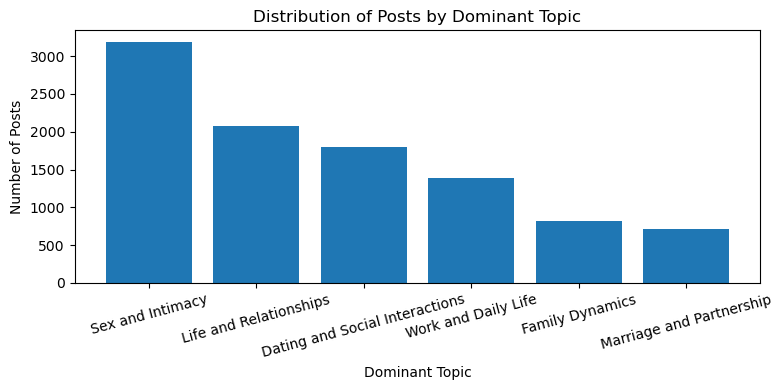

In [13]:
topic_counts = df['dom_topic'].value_counts()


plt.figure(figsize=(8, 4))  
plt.bar(topic_counts.index, topic_counts.values)  # Creating the  bars
plt.xlabel('Dominant Topic')  # x-axis Label
plt.ylabel('Number of Posts')  # y-axis Label
plt.title('Distribution of Posts by Dominant Topic')  # Add a title
plt.xticks(rotation=15)  # Rotating x-axis labels for better readability (optional)
plt.tight_layout()  # Adjusting spacing to prevent overlapping elements
plt.show()

In [15]:
topic_counts

dom_topic
Sex and Intimacy                  3183
Life and Relationships            2076
Dating and Social Interactions    1804
Work and Daily Life               1394
Family Dynamics                    822
Marriage and Partnership           717
Name: count, dtype: int64

It’s important that we keep in my that this is for all posts, regardless of flare. Investigation into the topic distribution for posts labelled “not safe for work” (NSFW) could shed more light on other aspects of intimacy and relationship concerns that users may not feel comfortable discussing openly. Through contrasting these two topic distributions, we’ll see the full overview of the range of issues people in this subreddit  are facing.
 

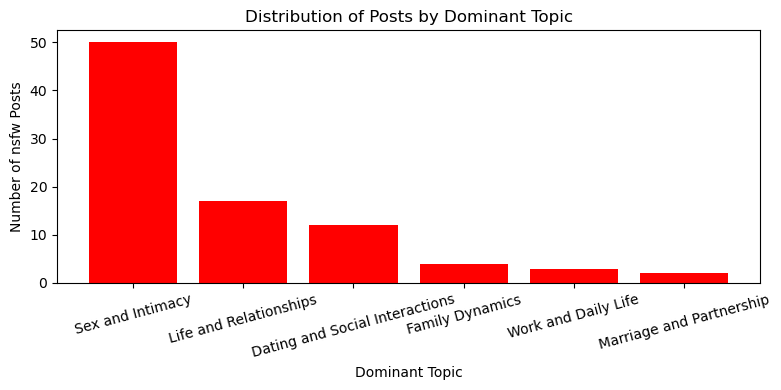

In [22]:
nsfw_posts = df[df['nsfw'] == 1]
nsfw_topic_counts = nsfw_posts['dom_topic'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 4))  
plt.bar(nsfw_topic_counts.index, nsfw_topic_counts.values, color= "red" )  # Creating the  bars
plt.xlabel('Dominant Topic')  # x-axis Label
plt.ylabel('Number of nsfw Posts')  # y-axis Label
plt.title('Distribution of Posts by Dominant Topic')  # Add a title
plt.xticks(rotation=15)  # Rotating x-axis labels for better readability (optional)
plt.tight_layout()  # Adjusting spacing to prevent overlapping elements
plt.show()

In [24]:
nsfw_topic_counts

dom_topic
Sex and Intimacy                  50
Life and Relationships            17
Dating and Social Interactions    12
Family Dynamics                    4
Work and Daily Life                3
Marriage and Partnership           2
Name: count, dtype: int64


**Observations**

One thread throughout this data is the discussion in r/relationship_advice that seems to revolve around sex and intimacy. It appears in both the regular and NSFW posts, which would mean that maximum importance is given to sexual health, satisfaction, and compatibility among the users. While most of the sexual issues hold top places on this list, the subreddit also has a more general set of problems relating to relationships encompassing life events, dating, family problems, work-life balance, and  marital issues. What is surprising, however, is the minute  difference in topic distribution between regular and NSFW posts, suggesting that either the NSFW tag is applied liberally or that there is openness about matters related to sex within the community.

**Possible Implications**

The data obtained points to a deep interrelation between sex and general relationship satisfaction. Further research may be done on exactly what these ties are, and how important they are. It is also remarkable how the platform as a source of ultra-honest  conversation about sexuality reflects possibly wide-ranging changes in societal attitudes. Another avenue for research could be in exploring how gender roles and gender dynamics are represented here, bringing great value to contemporary relationship norms, struggles, and how these shape discourse within this community.




Now that we have a better understanding of the topic distribution within the post, we will take a look at the comments and analyze the sentiment expressed within them. To further understand the emotional environment of r/relationship_advice. 


In [28]:
cm.head()

,idint,idstr,created,author,parent,submission,body,score,subreddit,distinguish,textlen
0,26200338326,t1_c1b06fq,1293840001,throwaway-o,t1_c1az6tm,t3_eu4fk,Beta has nothing to do with lack of muscles. ...,2.0,relationship_advice,NaN,158.0
1,26200338420,t1_c1b06ic,1293840045,throwaway-o,t1_c1azabo,t3_eu4fk,Remember that Alpha is not about being an SOB....,3.0,relationship_advice,NaN,125.0
2,26200338549,t1_c1b06lx,1293840104,throwaway-o,t3_etzk2,t3_etzk2,http://ezinearticles.com/?The-Four-Horsemen-of...,1.0,relationship_advice,NaN,75.0
3,26200339598,t1_c1b07f2,1293840597,Geaux,t3_euct6,t3_euct6,I understand your feeling the need to be with ...,8.0,relationship_advice,NaN,1415.0
4,26200340481,t1_c1b083l,1293841010,AMerrickanGirl,t1_c1b03ph,t3_euc0u,"No, apparently he has a lot to learn about rel...",2.0,relationship_advice,NaN,316.0


In [54]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

res = {}
for idx, row in cm.iterrows():
  if 'pp_text' in row and isinstance(row['pp_text'], str):
    text = row['pp_text']
    res[idx] = sia.polarity_scores(text)


if res:
  vaders = pd.DataFrame(res).T
  vaders = vaders.merge(cm, how='left', right_index=True, left_index=True)
  vaders.head()
print("hello")

hello


The code above was inspired by a post on Meduim that will be referenced at the bottom of this notebook. Each word is scored and combined to a total score to get an overall sentiment score of text (Adiaturb).


In [56]:
vaders.head()

NameError: name 'vaders' is not defined

In [44]:
# let's visualize the data, this takes a while  
import pandas as pd
import matplotlib.pyplot as plt

# Get sentiment labels
sentiment_labels = cm.columns.tolist()[0:4]

# Get sentiment frequencies
sentiment_frequencies = cm.sum(axis=0)

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(sentiment_labels, sentiment_frequencies, color=['red', 'green', 'blue', 'purple'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Frequency of Sentiments in Dataframe')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

<img src="img/sentimentanalysischart.png" width="700" />
Figure 1.2 Previous sentiment analysis chart results  

Comment sentiment analysis on the r/relationship_advice subreddit suggests that the dominant or most common attitude is one of neutrality. Although negative sentiment has a higher frequency  than positive, most comments fall into the  neutral category. This could mean that when giving advice on issues related to relationships, users often hold a very complex view. The predominance of the neutral polarity, in this case, signifies empathizing and willingness to understand, as opposed to rushing to condemn. This fosters a community where, most of the time, the users feel free to express themselves about their challenges without fear of negative evaluations.


### 1) Top sampeling 

 •**Selection Criteria**: Analyzing top-performing posts based on upvotes, comments, and shares to understand what drives engagement.
 
 •**Close Reading**: Conducting a detailed examination of the language, tone, and structure of top posts to understand their appeal.



In [58]:
top_5_rows = df.nlargest(5, 'score')  #this will give us the top 5 votes with the highest scores (upvotes-downvotes)
top_5_comments = df.nlargest(5, 'num_comments')  #this will give us the top 5 votes with the most comments 


top_5_rows[["title", "num_comments", "score", "dom_topic"]]

,title,num_comments,score,dom_topic
0,I (33m) overheard my girlfriend (28f) making f...,161,1918,Work and Daily Life
1,UPDATE: I (33m) overheard my girlfriend (28f) ...,310,1558,Work and Daily Life
2,Update: I [28f] literally just found email aft...,62,1311,Life and Relationships
3,UPDATE: My sister (28F) left her cat with me (...,42,800,Family Dynamics
4,"Update to ""I think my wife cheated on me, but ...",508,717,Sex and Intimacy



Out of the all-time top five posts, four of them are updates. These posts usually could be categorized into a few different topics, but they all involve very atypical situations or situations one would characterize as “shocking”.  These situations generate enormous amounts of intrigue that an "update" post is demanded. Let's further analyze the first two posts.  This will help us identify what specifically generates traffic in this community and what topics are considered the most important. 


In [60]:
top_5_rows.iloc[0]['selftext']

'I originally posted this elsewhere, but it was deleted for whatever reason. I\'m reposting so that I can link to it when I post the update. If that makes sense.\n\nMy girlfriend, "Jenna", and I have been together for 2 years, a little over.\n\nI\'m a veterinarian and we met at my office. She had just moved to the city and brought her dog in for an ear infection. We started talking and what should have been a 15 minute appointment turned into an hour long talking session.\n\nI\'ve never been so smitten with a woman before. Before Jenna, I lived the bachelor lifestyle. I was beginning to think I\'d just stay single forever, even though that lifestyle of nothing but casual flings was growing really old and empty.\n\nJenna is a charismatic woman with a lot of friends. Her best friend is a guy, "Dylan", she knew in her old town. I trust Jenna but I\'d be boldfaced lying if I said that her relationship with him doesn\'t bother me at all. I don\'t get angry with her or fight about it, she\'s

In [62]:
top_5_rows.iloc[1]['selftext']

'Link to original post: \n\nhttps://www.reddit.com/r/relationship_advice/comments/56j6zw/i_33m_overheard_my_girlfriend_28f_making_fun_of/\n\nWell, supportive Reddit strangers, I stayed strong and broke up with Jenna Thursday evening. This has honestly been the most dramatic couple of days of my entire life. I am exhausted. Things got pretty ugly on her part. Sorry that this is so long, a lot happened.\n\nAt the suggestion of my friends, mother, brother, and many of you, I talked to her in a private but still public place. The thought behind that was that someone who can be so cruel and reveal herself as a liar is potentially capable of trying to turn things around on me and say that she left me because I hurt her or some other nonsense. I\'d like to think she wouldn\'t do something like that, but who knows, especially after everything that has happened. Better safe than sorry.\n\nI thought about just boxing up her stuff and breaking things off with no explanation. But it has been over 

The first post is  a personal story of emotional betrayal: a veterinarian who discovered his girlfriend's belittling remarks about him to a male friend. The first tone is very conversational, part funny and part vulnerable. But it gets sharply focused on the emotional impact of this kind of revelation, with depictions of devastation and confusion.

The next post, witch is also just the update to the first post  tells the story of what happened since then. He explains the stormy breakup, their confrontation, and the subsequent fallout—property damage. Anger, disbelief, and flickers of empathy shift through the emotional landscape. It's a direct narrative, descriptive, telling starkly of the situation.

These posts clarify the dynamics of online confessional spaces. The raw emotion and amount of detail invested in the telling of the story bind the reader into a sense of empathy, creating engagement. That beeing said, this vulnerability of the author comes to be very instrumental in attracting users and eliciting responses. More importantly, the detailed narrative provides rich context for understanding the complexities of interpersonal relationships portrayed in r/relationship_advice. 


### 2) Zoom-in Sampling

• **High-Impact Comments**: Analyzing comments that significantly influence the discussion or advice on a post. Seeing what comments are the most popular. 

• **Contextual Interpretation**: Examining the societal and cultural norms reflected in these posts, particularly concerning gender roles and relationship dynamics. Most comments are really emotionally charged, and a large amount of them call for a breakup or divorce. 

• **Moderation rules**: Analysing how these rules influence the topics people are allowed to post, the influence of their norms and biases, insight into how they see the world
 



To get a better understanding of how conflict is resolved/ what type of advice is given, let's take a look at our comments data frame and the comments with the highest scores:



In [80]:
cm.nlargest(5, 'score') 

,idint,idstr,created,author,parent,submission,body,score,subreddit,distinguish,textlen
1563341,27779110109,t1_creyqjh,1432102219,whenifeellikeit,t3_36l7r9,t3_36l7r9,"What a horribly, paralyzingly awful moment you...",2237.0,relationship_advice,NaN,3626.0
381823,26462583780,t1_c5n50bo,1343925047,liah,t1_c5n1p0u,t3_xjxnb,> they all want an asshole on some level (agai...,1870.0,relationship_advice,NaN,3613.0
387420,26465762570,t1_c5p153e,1344273932,Teephphah,t1_c5ozcgw,t3_xribn,"Man here, so this is speculative, but I HAVE b...",1782.0,relationship_advice,NaN,2491.0
366241,26447087610,t1_c5dwvei,1342270847,GertrudeBeerstein,t3_wjl8y,t3_wjl8y,You're 6 years in and married. So a few days o...,1678.0,relationship_advice,NaN,2055.0
265081,26353244443,t1_c3u1hjv,1329967576,ekimmitt,t3_q1c9u,t3_q1c9u,She loves you. Don't worry about it because no...,1522.0,relationship_advice,NaN,258.0


In [95]:
cm.iloc[5]['body']

'Fighting is never good. A successful relationship is built around compromises and effective dialogue. Just because you say "I love you, you love me, things are okay" doesnt exactly mean it\'s true. You really ought to sit down with him when you can and talk about why you\'re fighting. \n\nYou need to be honest with each other and tell each person what it is about what they are doing upsets you and how it makes you feel. But, you also have to understand that this is loving criticism. From this criticism, you can then pledge to do things better (being very specific about what you\'re going to do). Wanting to be with someone you love means you are willing to become a better person from being with them. You don\'t really see your flaws until someone else tells them to you, but most of the time it\'s done out of spite. This needs to be done out of love. \n\nThis talk cannot get out of hand and it\'s EXTREMELY difficult to stop it from getting out of hand. If it does, it could mean the end 

Going through a few comments with the code above, we can see that the a majority of the comments can be considered to be of neutral judgment, this aligns with one of the subreddit rules that reads as follows: *“No questions that can be answered with yes or no (aka moral judgment)
Your post is a yes or no question (aka moral judgment) if your question starts with or contains any of the following: Is it...? Asking if you or the subject of the post is right or wrong. Am I....? Any variation of “Am I The Asshole?”, including AITA Does/Have anybody else...? Should I…? Would you....? Is this.....? Can I...?”*  (“Relationship Advice” Reddit) 

Instead of a simple judgment, such as "right" or "wrong," this subreddit hosts highly complex situations that enable a person to empathize and understand. The emphasis on emotional experiences  ties  in with the subreddit idea of giving moral support to a community of users who can share their problems and ask for advice.

By encouraging users to elaborate on their stories, this subreddit creates a platform for people to advise and learn from one another. This, in a way, makes the ban against moralistic questions evoke a culture where users can discuss issues freely, and provide different insights. This, therefore, contributes to richer understandings which have a deeper meaning on the dynamics of relationships.








<img src="img/pyLDAvistopic3 .png" width="700" />
Figure 2. LDA Topic Model: Topic 4, relevance metric 0.0




/



<img src="img/pyLDAvistopic4.png" width="700" />
Figure 3. LDA Topic Model: Topic 3, relevance metric 0.0



<img src="img/example_post.png" width="700" />
Figure 4. Example r/relationship_advice post 

In [135]:
df.loc[df['dom_topic'] == 'Dating and Social Interactions']['selftext'][10]

"This is an update of [this post](https://www.reddit.com/r/relationship_advice/comments/609equ/my_22m_girlfriend_20f_is_on_tinder_and_refuses_to/).\n \n\nThe conversation went like this:\n\nDo you still have Tinder installed on your smartphone?\n\n- Yes, but I don't use it very often and only to chat with a few people.\n\nCan you, for example, add those people on Facebook and remove Tinder after that?\n\n- Why?\n\nBecause I think you know I don't quite like the idea of you being on Tinder. If you would do what I just said I would prefer that.\n\n- I just get to know new people and that's it. Moreover I'm barely using it.\n\n \n\nEdit: Right after this I broke up with her."



As stated by Roland Barthes, mythology is a medium of communication through which norms, ideologies, and cultural values of society are communicated by diverse forms of speech. In the context of the community r/relationship_advice on Reddit, mythology plays an important role in setting and reflecting the collective understanding in regard to relationships, advice, and social expectations within the community.
Posts and comments in the r/relationship_advice subreddit often mask myths that pertain to romantic relationships, gender roles, and social expectations. For instance, the topics of infidelity, trust issues, boundaries, and communication problems in relationships do not stand alone as problems but rather are highly conditioned by myths coming from society about loyalty, truthfulness, and the ideal partnership. The advice that community members tend to give generally aligns with dominant cultural narratives, strengthening these myths. Signifiers, or specific words and phrases, gain new meanings within the context of relationship advice.

The above screenshots of a pyLDAvis topic model allow us to further examine this, allowing insights into different themes within the posts. For example, qualitatively topic number 3 "Work and Daily Life” has exclusive vocabulary such as “dish”, “cleaning”, “laundry”,  “rent” and “breadwinner”. We notice that these words all reference traditional genre roles in relationships and in the context of r/relationship_advice create myths surrounding those. Because in this subreddit, all these words all the catalysts for some form of conflict in a relationship therefore the signification of the words changes. 

The same thing can be observed for number 4  "Dating and Social interaction” which has exclusive vocabulary such as “photo”, “profile” and “Tinder”. In the context of the community the signification of “Tinder” changes to a conflict instigator and infidelity indicator. As a community, dating websites are not seen as something your partner should be on when they are in a relationship with you. This can be seen in an attached post below.  

Another relevant post could be one in which a user is seeking advice about how to deal with a boyfriend that is mad because his girlfriend “did a man’s job”. As expected, the responses are steeped in cultural myths about communication and the other comments express that the girlfriend needs to leave the relationship. These responses construct a mythology that informs the community's understanding of relationships and guides individual behavior.

In other words, mythology in r/relationship_advice is a means of expression and reinforcement for social values and norms in relationships. Through prevalent themes and patterns of advice, we can understand the kind of cultural ideology that forms the background for the shared knowledge of the community.



### 3) Bias Detection

  •**Word Embeddings**: Applying models like Word2Vec to capture semantic relationships and identify biases in word usage.
  
  •**Gender Bias Analysis**: Using predefined and custom target sets to detect gender biases in language.
  

In [102]:
model = Word2Vec.load('../../data/embeddings.emb')

In [110]:
tsne_path = '../../data/tsne_model'
tsne_df_path = '../../data/tsne_df.pkl'

with open(tsne_path, 'rb') as f:
    X_tsne = pickle.load(f)
    
tsne_df = pd.read_pickle(tsne_df_path)

In [112]:
import bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, LabelSet


In [114]:


plot_data = ColumnDataSource(tsne_df)

# Create the plot and configure the title, dimensions, and tools
tsne_plot = figure(title='t-SNE Word Embeddings')

# Add a hover tool to display words on roll-over
tsne_plot.add_tools(HoverTool(tooltips='@index') )

# Draw the words as circles on the plot
tsne_plot.circle('x', 'y',
                 source=plot_data,
                 color='blue',
                 line_alpha=0.2,
                 fill_alpha=0.1,
                 size=10,
                 hover_line_color='black')

# plot shown in another tab
show(tsne_plot)

With t-Distributed Stochastic Neighbor Embedding (t-SNE) Clusters indicating levels of semantic similarity among words. The t-SNE graph reveals numerous clusters of words that align with the most popular words in our topic modeling. In Addition to that,, we can also see emotional vocabulary implemented within the graph with different topics associated with/close to emotions. A notable example is “sad” next to “ex” or “happy” next "family”.  


In [116]:
from utils import calculate_biased_words

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kenzaachki/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kenzaachki/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [118]:
Women = ['sister', 'female', 'woman', 'girl', 'daughter', 'she', 'hers', 'her']
Men = ['brother', 'male', 'man', 'boy', 'son', 'he', 'his', 'him'] 
[b1, b2] = calculate_biased_words(model, Women, Men, 4)

print('Biased words towards Women')
print([word for word in b1.keys()])

print('Biased words towards Men')
print([word for word in b2.keys()] )


Biased words towards Women
['people', 'person', 'open', 'super', 'meeting', 'dates', 'sexy', 'shy', 'tinder', 'strangers', 'exes']
Biased words towards Men
['loves', 'pay', 'year_old', 'kid', 'pain', 'background', 'f', 'watch', 'abuse', 'growing', 'biggest', 'poor', 'death', 'income', 'responsibility', 'born', 'sake', 'raise', 'custody', 'suffer', 'household', 'foot', 'raising']


For the female target set, words relating to social interactions, personal characteristics, and dating contexts, reflect a stereotype that emphasizes social and relational aspects of women's lives.

In contrast, the male target set showed different biased words, commonly associated with responsibilities, financials, and familial roles, indicating a stereotype that focuses on men's societal roles and hardships

There is also another  moderation rule that reflects a great deal about how the community thinks: *“No referencing hateful subreddits and/or their rhetoric. Examples include, but is not limited to: red/blue/black/purplepill, PUA, FDS, MGTOW, etc. This includes, but is not limited to, referring to people as alpha/beta, calling yourself or users "friend-zoned", referring to people as Chads, Tyrones, or Staceys, pick-me's, or pornsick. Any infractions of this rule will result in a ban. This is not an all-inclusive list.”* (“Relationship Advice” Reddit)


These findings provide a compelling snapshot of how gender is constructed and  reinforced in the digital world of relationship advice. This strong contrast existing between the male and female target sets word clouds is indicative of deeply ingrained societal stereotypes. The also  data shows how the platform reinforces these conventional gender roles, where women are primarily associated with emotional labor, sociality, and personal relationships, while men are associated with financial responsibility, career, and family provision. These stereotypes do not just describe real life; they also appear to form it. A focus as strong as this placed on certain gendered expectations may raise interpersonal conflicts. When individuals are expected to conform to these stereotypes, deviations can lead to misunderstandings, resentment, and strained relationships.

Furthermore, the digital environment in which the subreddit resides can further amplify those biases. Online platforms like Reddit can lead to creating echo chambers in which one is simply exposed to viewpoints that align with one's own views. In such a way, its language reflects and reinforces broader cultural narratives about gender conducted within r/relationship_advice. The way media shapes perceptions has to be understood better in order to know exactly how to challenge these stereotypes and provide more equitable online interactions.
On the contribution of moderation to discourse, the moderation rules of this subreddit act as an inside look into how the community identifies itself and an intention to control discourses. The banning of terms used within pick-up artistry, red pill ideology, and other misogynistic subcultures shows the thoughtfulness of not perpetuating stereotypes and harmful behavior. The moderation of this subreddit creates these rules to make an environment more inclusive and respectful to people coming for advice on their relationships. However, it's important to consider if  these rules effectively address the underlying issues or simply displace problematic language without challenging  root causes.





### 4) Errors along the way

In [153]:
t1 = df['title'][2]
print(t1)


Update: I [28f] literally just found email after email from my fiancé [27m] to his ex girlfriend [20s/f] belittling and making fun of me and worse. Seriously shocked beyond belief right now.


In [155]:
def predict_gender_from_title(title):
  """How it works: Predicts gender based on the first occurrence of 'M' or 'F' in the title.

  Args:
    title: The title of the post.

  Returns:
    'male' if 'M' appears before 'F', 'female' if 'F' appears before 'M',
    'unknown' otherwise.
  """

  if 'm' in title and 'f' in title:
    return 'male' if title.index('m') < title.index('f') else 'female'
  elif 'm' in title:
    return 'male'
  elif 'f' in title:
    return 'female'
  else:
    return 'unknown'

print(predict_gender_from_title(t1)) 

female


Before concluding, it is essential to acknowledge the limitations encountered during this study. One  significant challenge I encountered was trying to implementation the random sampling methodology to ensure representative data, I ultimately decided to leave out. In addition, trying to laber authors by gender based on the post title like for example, " I 24M" for male—I couldn't find the optimal way to run it on the whole dataset. However, the other findings, in spite of these constraints, do give useful insights into the complexities of r/relationship_advice. 


## Conclusions



The analysis of r/relationship_advice points to a complex world between personal stories, societal norms, and gender biases in the digital setup of relationship advice. The subreddit functions almost like a microcosm of broader issues in society, with particular views on challenges related to sex, intimacy, and life-work balance. Sentiment analysis reflects a rather more neutral emotional envirment, hilighting a need for understanding and support over judgment. Moreover, conventional gender roles are furthered in the discourses of the subreddit, where women are normally associated with emotional labor and men with financial responsibility. The efforts of the community to regulate some of the bad content through moderation are notable; however, this does not really tackle the underlying issues associated with gender inequality.


To deepen our understanding of these dynamics, comparative analyses of other online forums about relationships may point to similarities and differences in gendered discourses. Temporal analysis  in the case of r/relationship_advice would outline how language and topics have changed through time. Finally, Investigating the intersectionality among gender, race, class, and sexual orientation would add much more depth to experiences  within the subreddit.








## References
Adiaturb. “Text Sentiment Analysis — End-to-End Machine Learning Project with Python.” Medium, 11 June 2023, 
https://medium.com/@adiaturb/text-sentiment-analysis-end-to-end-machine-learning-project-with-python-9644f4362ca2. Accessed 15 August 2024.


Barthes, Roland. Mythologies. Edited by Annette Lavers, translated by Annette Lavers, Vintage, 1993.


“Relationship Advice.” Reddit, https://www.reddit.com/r/relationship_advice. Accessed 15 August 2024.




In [188]:
# This code cell will give you a word count, in case you need it. 
# Note that this opens the file you are currently in, so make sure to save it first to get an accurate word count.

with open('DIGHUM160_essay_kachki.ipynb',encoding='utf-8') as json_file:
    data = json.load(json_file)

wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            # you might want to filter for more markdown keywords here
            temp = [word for word in line.split() if "#" not in word] 
            wordCount = wordCount + len(temp)
            
print(wordCount)

2982
